<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Errors_Terra_0_5h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23
m_jupiter= 18.9819e26
m_venus= 48.685e23

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic a partir de les dues constants anteriors

def normalitza(cos): # Primer passem a m i m/s, després normalitzem
  pos= cos[:3] * 1e3 / r0
  vel= cos[3:] * 1e3 * (t0 / r0)
  return pos, vel

def acceleracions(pos, masses): # pos és matriu N files i 3 columnes
    N= len(masses) # Nombre de planetes
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j:  # Si i ≠ j, perquè un cos no s'atrau a ell mateix
                diff= pos[j] - pos[i]
                d= np.linalg.norm(diff) # Calcula la norma del vector diferència de posicions
                acc[i]= acc[i] + masses[j] * diff / d**3
    return acc
def euler(pos, vel, masses, h):
    acc_euler= acceleracions(pos, masses)
    vel_nou= vel + h * acc_euler
    pos_nou= pos + h * vel
    return pos_nou, vel_nou

def rk4(pos, vel, masses, h):
    K1= vel
    L1= acceleracions(pos, masses)
    K2= vel + 0.5*h*L1
    L2= acceleracions(pos + 0.5*h*K1, masses)
    K3= vel + 0.5*h*L2
    L3= acceleracions(pos + 0.5*h*K2, masses)
    K4= vel + h*L3
    L4= acceleracions(pos + h*K3, masses)
    pos_nou= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nou= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nou, vel_nou


In [2]:
from google.colab import files
import pandas as pd
# Quan executem aquest codi des de Google Collab, trobarem l'opció de "Escollir arxius" a la terminal, on hem de seleccionar el fitxer "planet_pos_30min", que ha d'estar prèviament descarregat
def error_abs(NASA, numerica):
  """
  NASA: np.array, la solució extreta de la pàgina web
  numerica: np.array, calcul numèric
  """
  error = (NASA - numerica)
  return error

uploaded = files.upload()
file_path = '/content/planet_pos_30min.csv'
NASA = np.array([10**3,10**3,10**3])*np.array(pd.read_csv(file_path))
temps=len(NASA)-1

Saving planet_pos_30min.csv to planet_pos_30min.csv


[[-2.70501406e-02 -9.07664644e-02  1.65672226e-03]
 [-1.42778285e-01 -1.53397344e+01  2.54059133e-03]]


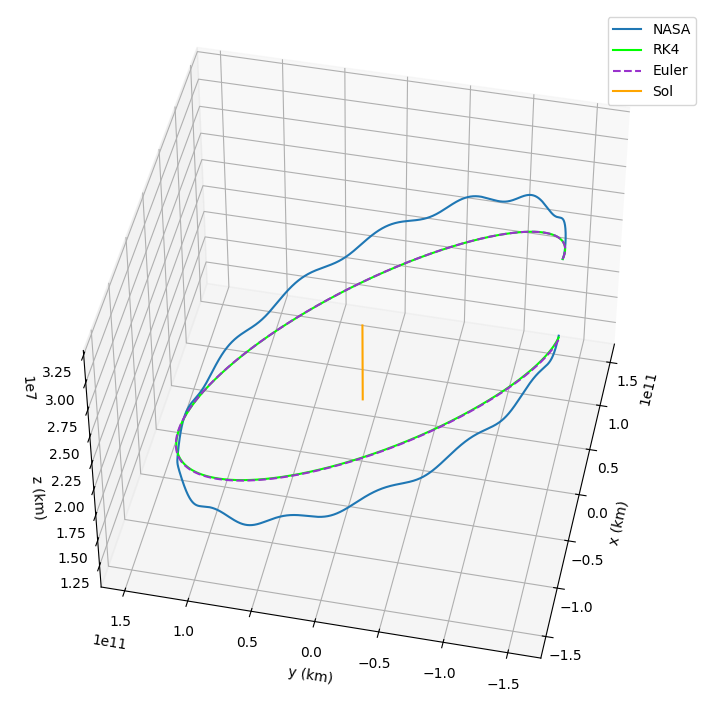

In [3]:
from ast import mod
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])

masses= np.array([m_sol/m0, m_terra/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
posicions= np.array([pos_sol, pos_terra])
velocitats= np.array([vel_sol, vel_terra])

dies= 365
h= 1/48
passos= int(dies/h)
euler_st= np.zeros((passos+1, 2, 3))
rk4_st  = np.zeros((passos+1, 2, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_st[0]= pos_euler
rk4_st[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_st[k+1]= pos_euler
    rk4_st[k+1]  = pos_rk4
print(pos_rk4)

fig= plt.figure(figsize=(9,9))
ax= fig.add_subplot(111, projection="3d")

# Terra dades reals NASA
ax.plot(NASA[:, 0], NASA[:, 1], NASA[:, 2], label="NASA")
# Terra RK4
ax.plot(rk4_st[:, 1, 0]*r0, rk4_st[:, 1, 1]*r0, rk4_st[:, 1, 2]*r0, label="RK4", color='lime')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(direction='in', length=6)
#Euler
ax.plot(euler_st[:, 1, 0]*r0, euler_st[:, 1, 1]*r0, euler_st[:, 1, 2]*r0, label="Euler", color='darkorchid', linestyle='--')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(direction='in', length=6)
# Sol
ax.plot(rk4_st[:, 0, 0]*r0,
        rk4_st[:, 0, 1]*r0,
        rk4_st[:, 0, 2]*r0,
        color="orange",
        label="Sol")

ax.view_init(elev=45, azim=192)  # modifica elev i azim segons convingui

ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("z (km)")

ax.legend()
plt.show()

In [4]:
from ast import mod
#Sol i Terra
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])

masses= np.array([m_sol/m0, m_terra/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
posicions= np.array([pos_sol, pos_terra])
velocitats= np.array([vel_sol, vel_terra])

dies= 365
h=1/48
passos= int(dies/h)
euler_st= np.zeros((passos+1, 2, 3))
rk4_st  = np.zeros((passos+1, 2, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_st[0]= pos_euler
rk4_st[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_st[k+1]= pos_euler
    rk4_st[k+1]  = pos_rk4

# Error Euler
error_e_st = error_abs(NASA, np.array([r0,r0,r0])*euler_st[:,1,:])

mod_error_e_st = []
for i in error_e_st:
  mod_error_e_st.append(np.linalg.norm(i))

# Error RK4
error_rk_st = error_abs(NASA, np.array([r0,r0,r0])*rk4_st[:,1,:])
mod_error_rk_st =[]
for i in error_rk_st:
  mod_error_rk_st.append(np.linalg.norm(i))


In [5]:
#Sol, Terra i Lluna
lluna= np.array([-1.223926947846045E+05, -1.526112945833626E+08, 5.512426763091981E+04, 2.865929048411513E+01, 7.673984975198109E-01, 6.367954761104172E-02])
terra= np.array([-4.133776193197704E+05, -1.528302631740080E+08, 3.242787546419352E+04, 2.932642969192311E+01, -7.378251225841874E-02, -1.172300943162528E-03])
sol= np.array([-6.709778526834890E+05, -8.035450223536204E+05, 2.366174814134883E+04, 1.263745636317092E-02, -3.212119035319765E-03, -2.265926685887389E-04])


masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
posicions= np.array([pos_sol, pos_terra, pos_lluna])
velocitats= np.array([vel_sol, vel_terra, vel_lluna])

dies= 365
h=1/48
passos= int(dies/h)
euler_stl= np.zeros((passos+1, 3, 3))
rk4_stl = np.zeros((passos+1, 3, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_stl[0]= pos_euler
rk4_stl[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_stl[k+1]= pos_euler
    rk4_stl[k+1]  = pos_rk4

# Error Euler
error_e_stl = error_abs(NASA, np.array([r0,r0,r0])*euler_stl[:,1,:])

mod_error_e_stl = []
for i in error_e_stl:
  mod_error_e_stl.append(np.linalg.norm(i))
# Error RK4
error_rk_stl = error_abs(NASA, np.array([r0,r0,r0])*rk4_stl[:,1,:])
mod_error_rk_stl =[]
for i in error_rk_stl:
  mod_error_rk_stl.append(np.linalg.norm(i))


In [6]:
#Sol, Terra, Lluna i Mart

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart])

dies= 365
h=1/48
passos= int(dies/h)
euler_stlm= np.zeros((passos+1, 4, 3))
rk4_stlm  = np.zeros((passos+1, 4, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_stlm[0]= pos_euler
rk4_stlm[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_stlm[k+1]= pos_euler
    rk4_stlm[k+1]  = pos_rk4

# Error Euler
error_e_stlm = error_abs(NASA, np.array([r0,r0,r0])*euler_stlm[:,1,:])

mod_error_e_stlm = []
for i in error_e_stlm:
  mod_error_e_stlm.append(np.linalg.norm(i))

# Error RK4
error_rk_stlm = error_abs(NASA, np.array([r0,r0,r0])*rk4_stlm[:,1,:])
mod_error_rk_stlm =[]
for i in error_rk_stlm:
  mod_error_rk_stlm.append(np.linalg.norm(i))




In [7]:
#Sol, terra, lluna, mart, jupiter

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])
jupiter= np.array([-3.766214907360811E+07, 7.674900530284423E+08, -2.340181864259541E+06, -1.320277350206942E+01, -1.821231426227618E-02, 2.954873217258936E-01])

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0, m_jupiter/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
pos_jupiter, vel_jupiter= normalitza(jupiter)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart, pos_jupiter])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart, vel_jupiter])

dies= 365
h= 1/48
passos= int(dies/h)
euler_stlmj= np.zeros((passos+1, 5, 3))
rk4_stlmj  = np.zeros((passos+1, 5, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_stlmj[0]= pos_euler
rk4_stlmj[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_stlmj[k+1]= pos_euler
    rk4_stlmj[k+1]  = pos_rk4

#Error Euler
error_e_stlmj = error_abs(NASA, np.array([r0,r0,r0])*euler_stlmj[:,1,:])

mod_error_e_stlmj = []
for i in error_e_stlmj:
  mod_error_e_stlmj.append(np.linalg.norm(i))

# Error RK4
error_rk_stlmj = error_abs(NASA, np.array([r0,r0,r0])*rk4_stlmj[:,1,:])
mod_error_rk_stlmj =[]
for i in error_rk_stlmj:
  mod_error_rk_stlmj.append(np.linalg.norm(i))


In [8]:
#Sol, venus, terra, lluna, mart, jupiter

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])
jupiter= np.array([-3.766214907360811E+07, 7.674900530284423E+08, -2.340181864259541E+06, -1.320277350206942E+01, -1.821231426227618E-02, 2.954873217258936E-01])
venus= np.array([9.000848903739944E+07, -6.083188193144653E+07, -6.033255262740046E+06, 1.912973897447851E+01, 2.905777575965793E+01, -7.040412673920500E-01])

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0, m_jupiter/m0, m_venus/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
pos_jupiter, vel_jupiter= normalitza(jupiter)
pos_venus, vel_venus= normalitza(venus)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart, pos_jupiter, pos_venus])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart, vel_jupiter, vel_venus])

dies= 365
h=1/48
passos= int(dies/h)
euler_svtlmj= np.zeros((passos+1, 6, 3))
rk4_svtlmj  = np.zeros((passos+1, 6, 3))
pos_euler, vel_euler= posicions.copy(), velocitats.copy()
pos_rk4, vel_rk4= posicions.copy(), velocitats.copy()
euler_svtlmj[0] = pos_euler
rk4_svtlmj[0]  = pos_rk4

for k in range(passos):
    pos_euler, vel_euler= euler(pos_euler, vel_euler, masses, h)
    pos_rk4, vel_rk4= rk4(pos_rk4, vel_rk4, masses, h)
    euler_svtlmj[k+1]= pos_euler
    rk4_svtlmj[k+1]  = pos_rk4

# Error Euler
error_e_svtlmj = error_abs(NASA, np.array([r0,r0,r0])*euler_svtlmj[:,1,:])

mod_error_e_svtlmj = []
for i in error_e_svtlmj:
  mod_error_e_svtlmj.append(np.linalg.norm(i))

# Error RK4
error_rk_svtlmj = error_abs(NASA, np.array([r0,r0,r0])*rk4_svtlmj[:,1,:])
mod_error_rk_svtlmj =[]
for i in error_rk_svtlmj:
  mod_error_rk_svtlmj.append(np.linalg.norm(i))


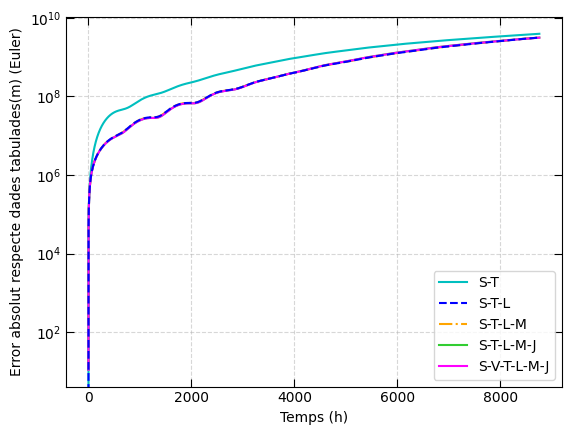

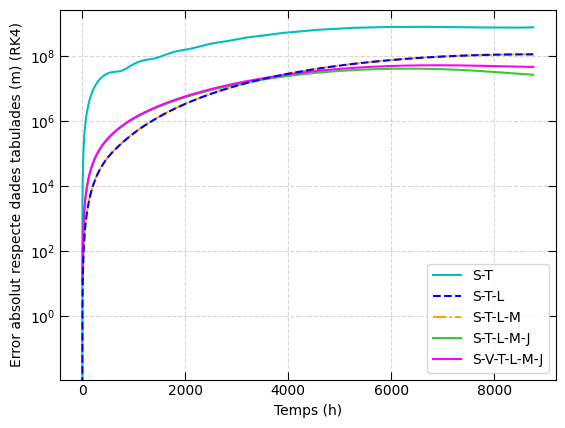

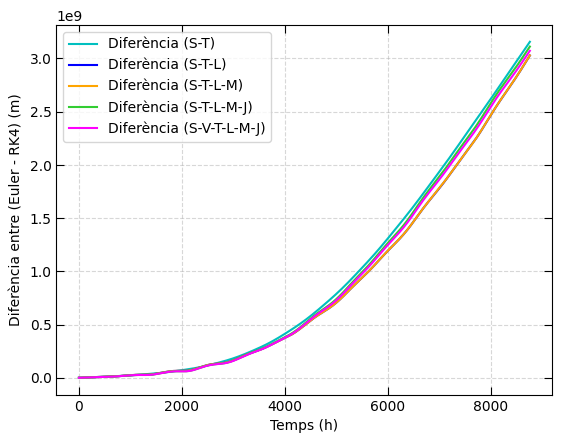

In [15]:
# Errors euler
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_e_st, label="S-T", color="c")
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_e_stl, label="S-T-L", color="blue", zorder=5, linestyle='--')
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_e_stlm, label="S-T-L-M", color ="orange", linestyle='-.')
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_e_stlmj, label ="S-T-L-M-J", color = "limegreen")
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_e_svtlmj, label ="S-V-T-L-M-J", color="magenta")
plt.yscale("log")
plt.xlabel("Temps (h)")
plt.ylabel("Error absolut respecte dades tabulades(m) (Euler)")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Errors RK4
3140816774.561751
3141571791.6680536
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_rk_st, label="S-T", color="c")
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_rk_stl, label="S-T-L", color="blue", zorder=5, linestyle='--')
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_rk_stlm, label="S-T-L-M", color ="orange", linestyle='-.')
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_rk_stlmj, label ="S-T-L-M-J", color = "limegreen")
plt.plot(np.linspace(0, 8760, 8761*2-1),mod_error_rk_svtlmj, label ="S-V-T-L-M-J", color="magenta")
plt.yscale("log")
plt.xlabel("Temps (h)")
plt.ylabel("Error absolut respecte dades tabulades (m) (RK4)")
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Diferències entre errors per als diversos sistemes
dif_euler = np.array([mod_error_e_st, mod_error_e_stl, mod_error_e_stlm, mod_error_e_stlmj, mod_error_e_svtlmj])
dif_rk4 = np.array([mod_error_rk_st, mod_error_rk_stl, mod_error_rk_stlm, mod_error_rk_stlmj, mod_error_rk_svtlmj])

dif_error_all = dif_euler - dif_rk4


labels = ["S-T", "S-T-L", "S-T-L-M","S-T-L-M-J", "S-V-T-L-M-J"]
colors = ['c', 'blue', 'orange','limegreen', 'magenta']

for i in range(len(dif_error_all)):
    plt.plot(np.linspace(0, 8760, 8761*2-1), dif_error_all[i], label=f"Diferència ({labels[i]})", color=colors[i])

plt.xlabel("Temps (h)")
plt.ylabel("Diferència entre (Euler - RK4) (m)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', direction='in', length=6, top=True, right=True)
plt.legend()
plt.show()


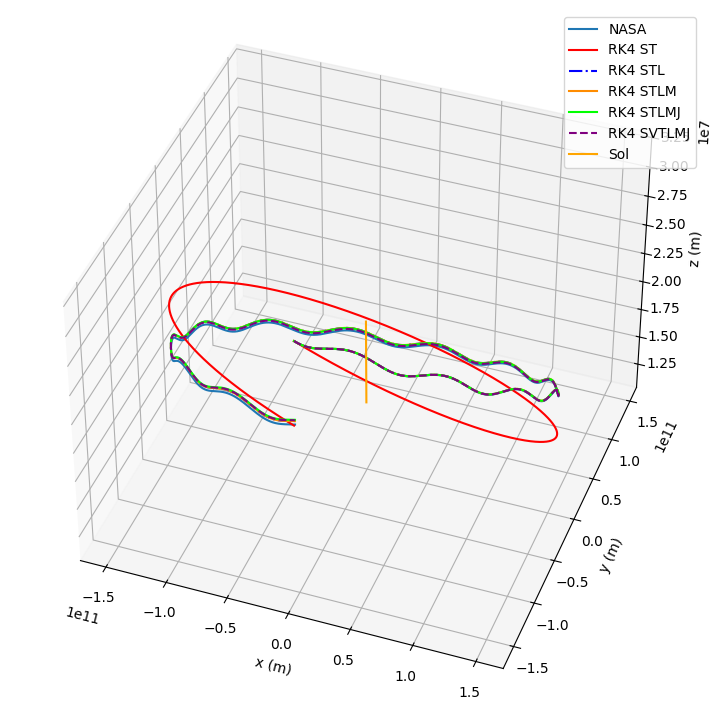

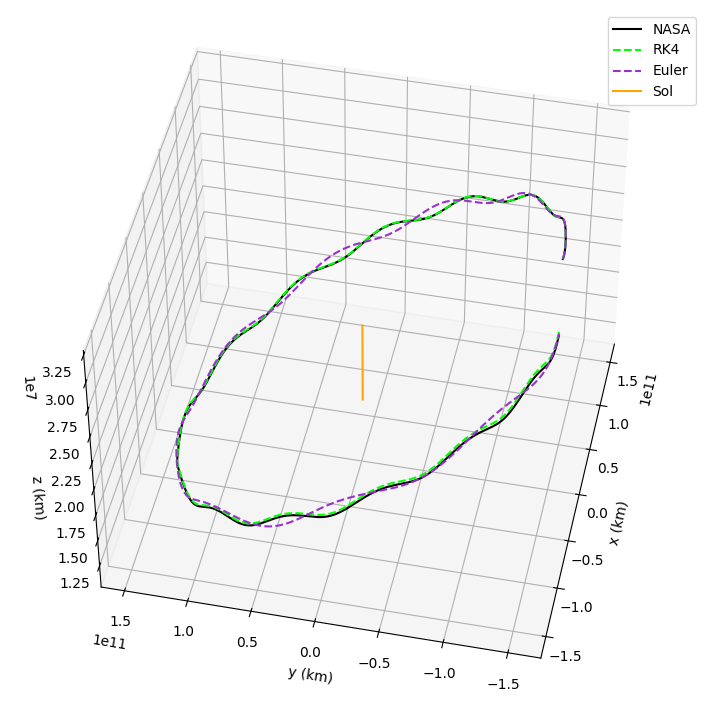

In [10]:

#Comparativa de les diferents òrbites a rk4 i real
fig= plt.figure(figsize=(9,9))
ax= fig.add_subplot(111, projection="3d")

ax.plot(NASA[:, 0], NASA[:, 1], NASA[:, 2], label="NASA")

ax.plot(rk4_st[:, 1, 0]*r0, rk4_st[:, 1, 1]*r0, rk4_st[:, 1, 2]*r0, label="RK4 ST", color="red")
ax.plot(rk4_stl[:, 1, 0]*r0, rk4_stl[:, 1, 1]*r0, rk4_stl[:, 1, 2]*r0, label="RK4 STL", color="blue", linestyle='-.')
ax.plot(rk4_stlm[:, 1, 0]*r0, rk4_stlm[:, 1, 1]*r0, rk4_stlm[:, 1, 2]*r0, label="RK4 STLM", color ="darkorange")
ax.plot(rk4_stlmj[:, 1, 0]*r0, rk4_stlmj[:, 1, 1]*r0, rk4_stlmj[:, 1, 2]*r0, label="RK4 STLMJ", color="lime")
ax.plot(rk4_svtlmj[:, 1, 0]*r0, rk4_svtlmj[:, 1, 1]*r0, rk4_svtlmj[:, 1, 2]*r0, label="RK4 SVTLMJ", color="purple", linestyle='--')

# Sol
ax.plot(rk4_st[:, 0, 0]*r0,
        rk4_st[:, 0, 1]*r0,
        rk4_st[:, 0, 2]*r0,
        color="orange",
        label="Sol")

zoom_idx = 1250
center_x = NASA[zoom_idx, 0]
center_y = NASA[zoom_idx, 1]
center_z = NASA[zoom_idx, 2]

# zoom_range = 5e6
# ax.set_xlim(center_x - zoom_range, center_x + zoom_range)
# ax.set_ylim(center_y - zoom_range, center_y + zoom_range)
# ax.set_zlim(center_z - zoom_range, center_z + zoom_range)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")

ax.view_init(elev=40, azim=-70)

ax.legend()
plt.show()

fig= plt.figure(figsize=(9,9))
ax= fig.add_subplot(111, projection="3d")

# Terra dades reals NASA
ax.plot(NASA[:, 0], NASA[:, 1], NASA[:, 2], label="NASA", color='black')
# Terra RK4
ax.plot(rk4_svtlmj[:, 1, 0]*r0, rk4_svtlmj[:, 1, 1]*r0, rk4_svtlmj[:, 1, 2]*r0, label="RK4", color='lime', linestyle='--')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(direction='in', length=6)
#Euler
ax.plot(euler_svtlmj[:, 1, 0]*r0, euler_svtlmj[:, 1, 1]*r0, euler_svtlmj[:, 1, 2]*r0, label="Euler", color='darkorchid', linestyle='--')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(direction='in', length=6)
# Sol
ax.plot(rk4_st[:, 0, 0]*r0,
        rk4_st[:, 0, 1]*r0,
        rk4_st[:, 0, 2]*r0,
        color="orange",
        label="Sol")

ax.view_init(elev=45, azim=192)  # modifica elev i azim segons convingui

ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("z (km)")

ax.legend()
plt.show()